In [1]:
import os
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow as pa
import datetime

# set the folder path where the CSV files are located
basepath = "C:/Users/camd1/OneDrive - KU Leuven/2. Master of Statistics and Data Science 22-24/Year 1/Semester 2/Modern Data Analytics/KUL-MDA/"

In [2]:
def process_files(folder_path, file_names):
    # Initialize empty dataframe (this makes polars works)
    df_filter = pl.DataFrame({"ID":["LC-null"],"rain":["NA"],"month":[0],"day":[0],"hour":[0],"temp":["NA"]})

    # Iterate over files
    for file_name in file_names:
        df = pl.read_csv(folder_path + file_name, 
            columns=[1,6,12,13,14,20], 
            new_columns=['ID','rain','month','day','hour','temp'],
            infer_schema_length=1500000
        )

        # Filter ID
        df = df.filter(pl.col("ID").is_in(df2_filtered['ID'].unique().to_list()))

        # Append to target dataframe
        df_filter.extend(df)

    return df_filter

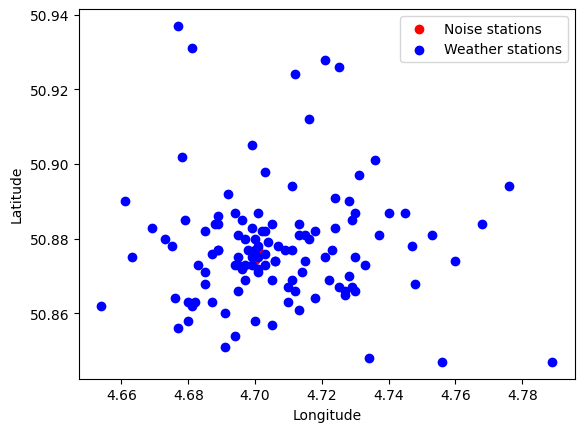

In [3]:
# Load the data from the two polars dataframes
df1 = pl.read_csv(os.path.join(basepath, 'noise_meta.csv'))
# Remove noise stations 7 8 9
df1 = df1.slice(0,6)
df2 = pl.read_csv(os.path.join(basepath,'01_Metadata_v2.csv'))

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot the locations from the first dataframe as red dots
ax.scatter(df1['LON'], df1['LAT'], color='red', label='Noise stations')

# Plot the locations from the second dataframe as blue dots
ax.scatter(df2['LON'], df2['LAT'], color='blue', label='Weather stations')

# Set the axis labels and legend
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Show the plot
plt.show()


In [4]:
# Find the range of longitude and latitude values in df1
lon_min, lon_max = df1['LON'].min(), df1['LON'].max()
lat_min, lat_max = df1['LAT'].min(), df1['LAT'].max()

# Filter df2 to find locations that are within the range of longitude and latitude values in df1
df2_filtered = df2.filter((df2['LON'] > lon_min) & (df2['LON'] < lon_max) & (df2['LAT'] > lat_min) & (df2['LAT'] < lat_max))

# Print the location
print(df2_filtered)

shape: (1, 9)
┌────────┬────────┬─────┬─────┬───┬─────┬─────────────────┬───────────────────┬────────────────────┐
│ ID     ┆ LAT    ┆ LON ┆ ALT ┆ … ┆ LC  ┆ building_height ┆ SVF               ┆ installation_heigh │
│ ---    ┆ ---    ┆ --- ┆ --- ┆   ┆ --- ┆ ---             ┆ ---               ┆ t                  │
│ str    ┆ f64    ┆ f64 ┆ i64 ┆   ┆ i64 ┆ f64             ┆ str               ┆ ---                │
│        ┆        ┆     ┆     ┆   ┆     ┆                 ┆                   ┆ i64                │
╞════════╪════════╪═════╪═════╪═══╪═════╪═════════════════╪═══════════════════╪════════════════════╡
│ LC-117 ┆ 50.877 ┆ 4.7 ┆ 26  ┆ … ┆ 0   ┆ 20.655555       ┆ 0.651494879996966 ┆ 3                  │
└────────┴────────┴─────┴─────┴───┴─────┴─────────────────┴───────────────────┴────────────────────┘


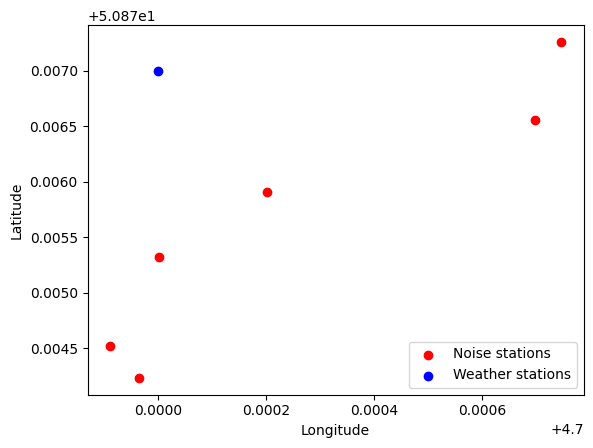

In [5]:
# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot the locations from the first dataframe as red dots
ax.scatter(df1['LON'], df1['LAT'], color='red', label='Noise stations')

# Plot the locations from the second dataframe as blue dots
ax.scatter(df2_filtered['LON'], df2_filtered['LAT'], color='blue', label='Weather stations')

# Set the axis labels and legend
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Show the plot
plt.show()

In [6]:
files = ["LC_2022Q1.csv", "LC_2022Q2.csv", "LC_2022Q3.csv", "LC_2022Q4.csv"]
lc_df = process_files(basepath, files).slice(1, None).filter(pl.col('rain') != 'NA')
print(lc_df)
lc_pd = lc_df.to_pandas()
# create a new column "weekend" based on the "month" and "day" columns
lc_pd['weekend'] = pd.to_datetime('2022-' + lc_pd['month'].astype(str) + '-' + lc_pd['day'].astype(str)).dt.day_name()

# replace weekdays with 0 and weekends with 1
lc_pd['weekend'] = lc_pd['weekend'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
lc_pd.to_csv('lc_pd.csv', index=False)

shape: (52_553, 6)
┌────────┬──────┬───────┬─────┬──────┬──────────┐
│ ID     ┆ rain ┆ month ┆ day ┆ hour ┆ temp     │
│ ---    ┆ ---  ┆ ---   ┆ --- ┆ ---  ┆ ---      │
│ str    ┆ str  ┆ i64   ┆ i64 ┆ i64  ┆ str      │
╞════════╪══════╪═══════╪═════╪══════╪══════════╡
│ LC-117 ┆ 0    ┆ 1     ┆ 1   ┆ 0    ┆ 13.11754 │
│ LC-117 ┆ 0    ┆ 1     ┆ 1   ┆ 0    ┆ 13.10622 │
│ LC-117 ┆ 0    ┆ 1     ┆ 1   ┆ 0    ┆ 13.24006 │
│ LC-117 ┆ 0    ┆ 1     ┆ 1   ┆ 0    ┆ 13.1387  │
│ …      ┆ …    ┆ …     ┆ …   ┆ …    ┆ …        │
│ LC-117 ┆ 0    ┆ 12    ┆ 31  ┆ 23   ┆ 16.5464  │
│ LC-117 ┆ 0    ┆ 12    ┆ 31  ┆ 23   ┆ 16.44898 │
│ LC-117 ┆ 0    ┆ 12    ┆ 31  ┆ 23   ┆ 16.33138 │
│ LC-117 ┆ 0    ┆ 1     ┆ 1   ┆ 0    ┆ 16.22206 │
└────────┴──────┴───────┴─────┴──────┴──────────┘


In [7]:
print(lc_pd)

           ID rain  month  day  hour      temp  weekend
0      LC-117    0      1    1     0  13.11754        1
1      LC-117    0      1    1     0  13.10622        1
2      LC-117    0      1    1     0  13.24006        1
3      LC-117    0      1    1     0   13.1387        1
4      LC-117    0      1    1     0  13.10622        1
...       ...  ...    ...  ...   ...       ...      ...
52548  LC-117    0     12   31    23  16.55352        1
52549  LC-117    0     12   31    23   16.5464        1
52550  LC-117    0     12   31    23  16.44898        1
52551  LC-117    0     12   31    23  16.33138        1
52552  LC-117    0      1    1     0  16.22206        1

[52553 rows x 7 columns]


In [8]:
# Load data into a pandas DataFrame
data = pd.read_csv('data.csv')

# Define the variables
X = data[['continuous_var_1', 'continuous_var_2', 'continuous_var_3', 'categorical_var']]
y = data['response_var']
time = data['time']

# Create a periodic variable using sin and cos functions of time
X['time_sin'] = np.sin(2*np.pi*time/24)
X['time_cos'] = np.cos(2*np.pi*time/24)

# Fit the GLM model
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary of the model
print(results.summary())


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'